In [1]:
import os
import numpy as np
import reading 
from feature_extractor import feature_extractor
import pandas as pd
import matplotlib.pyplot as plt

Load dei Path, Con il sort giusto per far corrispondere i soggetti

In [2]:
paths_FA= reading.data_path("Diffusion_parameters_maps-20230215T134959Z-001","corrected_FA_image")
paths_masks=reading.data_path("Diffusion_space_segmentations-20230215T134839Z-001","Diffusion_space_segmentations-20230215T134839Z-001")


#print((os.path.basename(paths_masks[0]).split('_')[2]))

paths_FA.sort(key=lambda x: int(os.path.basename(x).split('_')[3]))
paths_masks.sort(key=lambda x: int(os.path.basename(x).split('_')[2]))


Feature extraction

In [3]:
region, mean, std=feature_extractor(paths_FA,paths_masks)



ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =

     5


ans =



Reshape degli array per fare il Dataframe

In [4]:
mean_t=np.transpose(mean)
std_t=np.transpose(std)


Creo DataFrame per mean and std

In [5]:


df_mean = pd.DataFrame(mean_t[1:,1:177],index=mean[0][1:98],columns=region[1:177])
df_std=pd.DataFrame(std_t[1:,1:177],index=std[0][1:98],columns=region[1:177])

df_mean.head()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,wm-rh-superiorfrontal,wm-rh-superiorparietal,wm-rh-superiortemporal,wm-rh-supramarginal,wm-rh-frontalpole,wm-rh-temporalpole,wm-rh-transversetemporal,wm-rh-insula,Left-UnsegmentedWhiteMatter,Right-UnsegmentedWhiteMatter
1.0,0.008558,0.109013,0.172291,0.260344,0.122025,0.236524,0.126373,0.228594,0.230439,0.107770,...,0.252780,0.217847,0.258662,0.268637,0.276182,0.214232,0.158717,0.367259,0.301571,0.328116
2.0,0.010137,0.107341,0.171492,0.299163,0.133621,0.256451,0.160723,0.226560,0.239494,0.118588,...,0.286469,0.253083,0.261861,0.238354,0.260860,0.178386,0.178781,0.357016,0.330572,0.366950
3.0,0.008196,0.133892,0.112614,0.262373,0.111241,0.247089,0.133506,0.211761,0.219353,0.106775,...,0.254498,0.258600,0.268107,0.245099,0.270796,0.149528,0.172897,0.257598,0.295915,0.337266
4.0,0.012099,0.114534,0.134856,0.289858,0.112977,0.243535,0.153650,0.230634,0.249325,0.080339,...,0.256776,0.215121,0.285465,0.257601,0.238565,0.191491,0.177666,0.226578,0.301181,0.359059
5.0,0.011768,0.105971,0.110494,0.269097,0.106641,0.248220,0.139430,0.246313,0.263455,0.106332,...,0.232970,0.210857,0.304468,0.250227,0.257328,0.252974,0.189921,0.272185,0.309642,0.373039


Aggiungo i gruppi

In [6]:
a=pd.DataFrame(pd.read_csv('/home/francesco/CompProject/ADNI_dataset_diffusion.csv'))
a.sort_values(by=["Subject"],inplace=True)
group=a["Group"]
a.head()

,Subject,Group,Sex,Age
67,4002,0,F,74.0
68,4003,0,F,72.0
28,4009,1,M,90.0
69,4018,0,M,76.0
70,4050,0,M,77.0


Albero decisionale: creo i set e splitto

In [7]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


X=df_mean.values
y=group.values

X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=.1, random_state=6)



Fitto l'albero

In [8]:

rf = RandomForestClassifier()
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tst)

print(y_pred)

[1 0 1 1 0 0 0 1 0 1]


In [9]:
accuracy = accuracy_score(y_tst, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


Hyperparameter tuning

In [10]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=100, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_tr, y_tr)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'max_depth': 14, 'n_estimators': 230}


In [11]:
y_pred = rand_search.predict(X_tst)

accuracy = accuracy_score(y_tst, y_pred)
precision = precision_score(y_tst, y_pred)
recall = recall_score(y_tst, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7
Precision: 0.5
Recall: 1.0


Plotto alberi

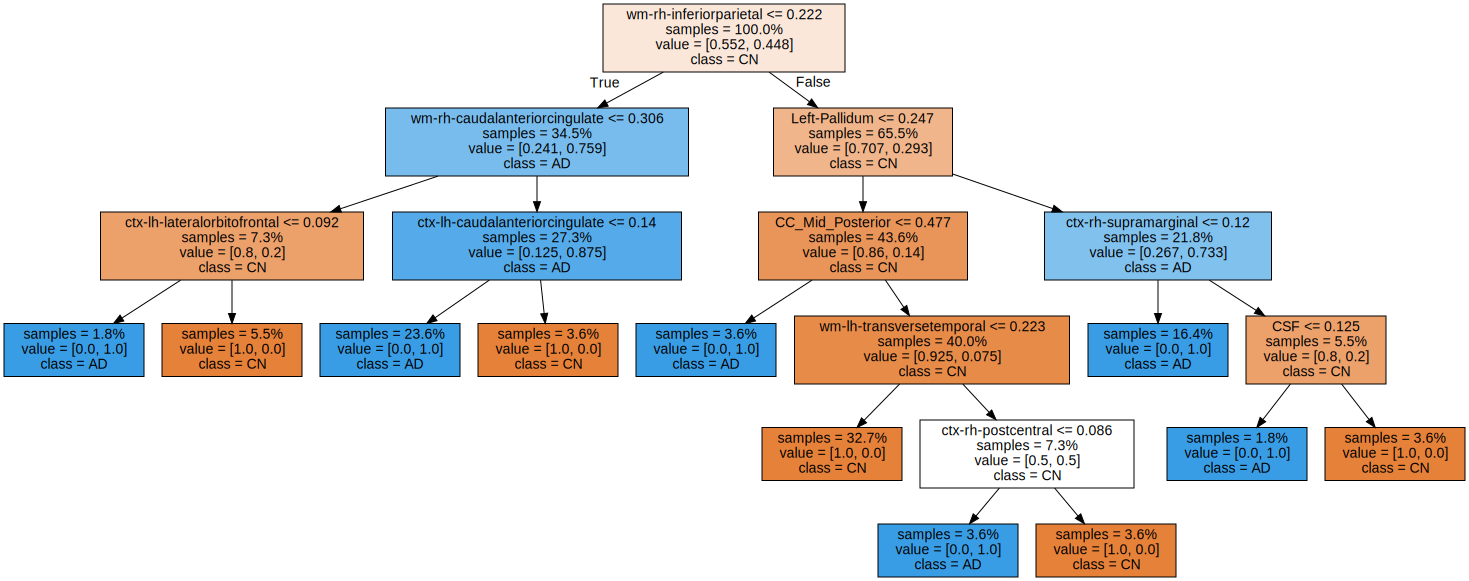

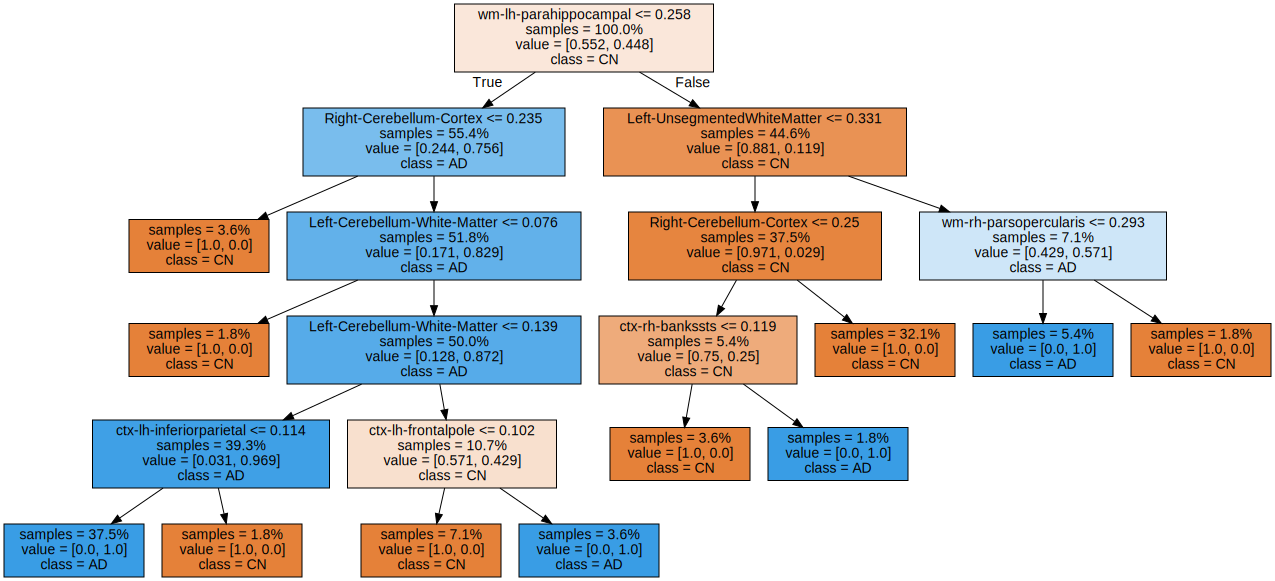

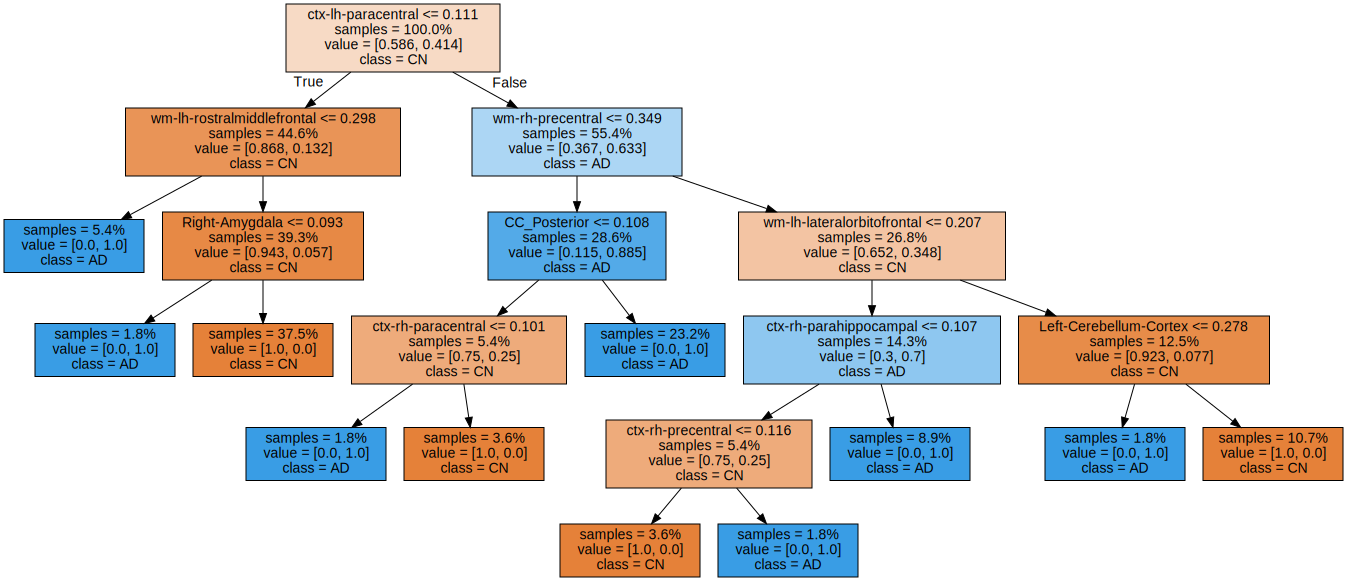

In [12]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


for i in range(3):
    tree = rand_search.best_estimator_[i]
    dot_data = export_graphviz(tree,feature_names=region[1:],  filled=True, impurity=False, proportion=True,class_names=["CN","AD"])
    graph = graphviz.Source(dot_data)
    display(graph)

ROC

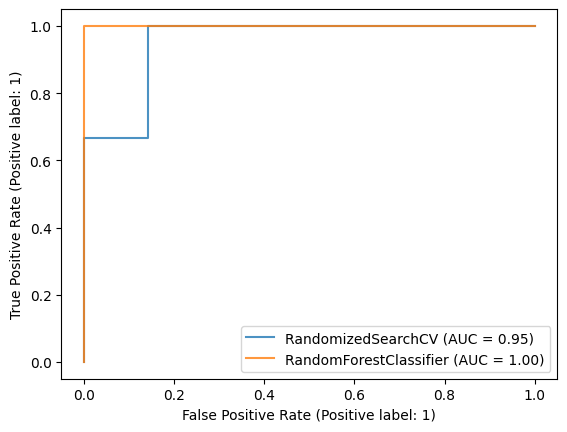

In [13]:
from sklearn.metrics import RocCurveDisplay
rf.fit(X_tr, y_tr)

ax = plt.gca()
rnds_disp = RocCurveDisplay.from_estimator(rand_search, X_tst, y_tst, ax=ax, alpha=0.8)
rndf_disp = RocCurveDisplay.from_estimator(rf, X_tst, y_tst, ax=ax, alpha=0.8)


plt.show()